In [ ]:
# Install required packages
!pip install pandas numpy matplotlib seaborn plotly
!pip install scikit-learn xgboost lightgbm
!pip install datasets  # Hugging Face datasets
!pip install mlflow
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.3/788.3 kB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.6 MB/s eta 0:00:00


In [ ]:
# Import required libraries
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings


In [ ]:
# Load dataset from Hugging Face Hub
# Replace 'your-username/dataset-name' with your actual Hugging Face dataset path
dataset = load_dataset('Srvan01/india_housing_prices')

# Convert to pandas DataFrame
df = dataset['train'].to_pandas()

# Display basic info
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

india_housing_prices.csv:   0%|          | 0.00/41.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/250000 [00:00<?, ? examples/s]

Dataset shape: (250000, 23)

First few rows:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [ ]:
# Check the first few rows
print("First 5 rows:")
print(df.head())

First 5 rows:
   ID        State      City      Locality      Property_Type  BHK  \
0   1   Tamil Nadu   Chennai   Locality_84          Apartment    1   
1   2  Maharashtra      Pune  Locality_490  Independent House    3   
2   3       Punjab  Ludhiana  Locality_167          Apartment    2   
3   4    Rajasthan   Jodhpur  Locality_393  Independent House    2   
4   5    Rajasthan    Jaipur  Locality_466              Villa    4   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0          4740          489.76            0.10        1990  ...   
1          2364          195.52            0.08        2008  ...   
2          3642          183.79            0.05        1997  ...   
3          2741          300.29            0.11        1991  ...   
4          4823          182.90            0.04        2002  ...   

  Age_of_Property  Nearby_Schools  Nearby_Hospitals  \
0              35              10                 3   
1              17               8             

In [ ]:
# Check data types and info
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  T

In [ ]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64


In [ ]:

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())



Statistical Summary:
                  ID            BHK   Size_in_SqFt  Price_in_Lakhs  \
count  250000.000000  250000.000000  250000.000000   250000.000000   
mean   125000.500000       2.999396    2749.813216      254.586854   
std     72168.927986       1.415521    1300.606954      141.349921   
min         1.000000       1.000000     500.000000       10.000000   
25%     62500.750000       2.000000    1623.000000      132.550000   
50%    125000.500000       3.000000    2747.000000      253.870000   
75%    187500.250000       4.000000    3874.000000      376.880000   
max    250000.000000       5.000000    5000.000000      500.000000   

       Price_per_SqFt     Year_Built       Floor_No   Total_Floors  \
count   250000.000000  250000.000000  250000.000000  250000.000000   
mean         0.130597    2006.520012      14.966800      15.503004   
std          0.130747       9.808575       8.948047       8.671618   
min          0.000000    1990.000000       0.000000       1.000000 

SECTION 1: BASIC DATASET CHARACTERISTICS

📊 Dataset Shape: 250,000 rows × 23 columns

📝 Column Names:
  1. ID
  2. State
  3. City
  4. Locality
  5. Property_Type
  6. BHK
  7. Size_in_SqFt
  8. Price_in_Lakhs
  9. Price_per_SqFt
  10. Year_Built
  11. Furnished_Status
  12. Floor_No
  13. Total_Floors
  14. Age_of_Property
  15. Nearby_Schools
  16. Nearby_Hospitals
  17. Public_Transport_Accessibility
  18. Parking_Space
  19. Security
  20. Amenities
  21. Facing
  22. Owner_Type
  23. Availability_Status

🔢 Data Types:
ID                                  int64
State                              object
City                               object
Locality                           object
Property_Type                      object
BHK                                 int64
Size_in_SqFt                        int64
Price_in_Lakhs                    float64
Price_per_SqFt                    float64
Year_Built                          int64
Furnished_Status                   object
Floor_No

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move



👀 Last 5 Rows:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move
249999,250000,Haryana,Gurgaon,Locality_268,Independent House,3,4313,199.69,0.05,1990,...,35,10,6,Medium,No,No,"Gym, Garden",South,Owner,Under_Construction



🎲 Random Sample (5 rows):


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
140089,140090,Telangana,Warangal,Locality_83,Independent House,4,1904,268.30,0.14,1991,...,34,7,6,High,No,No,"Pool, Garden, Playground, Gym, Clubhouse",North,Owner,Ready_to_Move
93747,93748,Haryana,Faridabad,Locality_418,Independent House,1,669,190.74,0.29,1993,...,32,2,8,Low,Yes,No,"Gym, Clubhouse, Pool",North,Builder,Under_Construction
180647,180648,Uttar Pradesh,Noida,Locality_208,Independent House,3,3564,458.42,0.13,2018,...,7,5,2,Low,No,No,"Gym, Clubhouse, Playground, Pool, Garden",South,Builder,Under_Construction
64526,64527,Maharashtra,Pune,Locality_285,Apartment,5,1102,31.84,0.03,2013,...,12,3,1,Low,No,Yes,"Clubhouse, Garden, Playground",West,Owner,Ready_to_Move
19100,19101,Uttarakhand,Dehradun,Locality_310,Villa,4,1360,331.24,0.24,2002,...,23,4,7,Medium,No,No,"Gym, Playground, Pool, Clubhouse, Garden",South,Builder,Ready_to_Move



📈 Numerical Variables (11):
['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals']

📋 Categorical Variables (12):
['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']

SECTION 2: DATA QUALITY ASSESSMENT

❓ Missing Values Analysis:
  ✅ No missing values found!

🔄 Duplicate Rows: 0 (0.00%)

✅ Data Type Check:
  ID: int64 | Unique Values: 250,000
  State: object | Unique Values: 20
  City: object | Unique Values: 42
  Locality: object | Unique Values: 500
  Property_Type: object | Unique Values: 3
  BHK: int64 | Unique Values: 5
  Size_in_SqFt: int64 | Unique Values: 4,501
  Price_in_Lakhs: float64 | Unique Values: 48,700
  Price_per_SqFt: float64 | Unique Values: 100
  Year_Built: int64 | Unique Values: 34
  Furnished_Status: object | Unique Va

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000



📋 Statistical Summary (Categorical Variables):


,State,City,Locality,Property_Type,Furnished_Status,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
count,250000,250000,250000,250000,250000,250000,250000,250000,250000,250000,250000,250000
unique,20,42,500,3,3,3,2,2,325,4,3,2
top,Odisha,Coimbatore,Locality_296,Villa,Unfurnished,High,No,Yes,Pool,West,Broker,Under_Construction
freq,12681,6461,567,83744,83408,83705,125456,125233,10218,62757,83479,125035



📍 Central Tendency Measures:

ID:
  Mean: 125000.50
  Median: 125000.50
  Mode: 1

BHK:
  Mean: 3.00
  Median: 3.00
  Mode: 1

Size_in_SqFt:
  Mean: 2749.81
  Median: 2747.00
  Mode: 2098

Price_in_Lakhs:
  Mean: 254.59
  Median: 253.87
  Mode: 40.22

Price_per_SqFt:
  Mean: 0.13
  Median: 0.09
  Mode: 0.05

Year_Built:
  Mean: 2006.52
  Median: 2007.00
  Mode: 2023

Floor_No:
  Mean: 14.97
  Median: 15.00
  Mode: 20

Total_Floors:
  Mean: 15.50
  Median: 15.00
  Mode: 24

Age_of_Property:
  Mean: 18.48
  Median: 18.00
  Mode: 2

Nearby_Schools:
  Mean: 5.50
  Median: 5.00
  Mode: 1

Nearby_Hospitals:
  Mean: 5.50
  Median: 5.00
  Mode: 4

SECTION 4: OUTLIER DETECTION

🔍 Outlier Detection (IQR Method):


,Column,Outliers,Percentage,Lower_Bound,Upper_Bound
0,ID,0,0.000,-124998.500,374999.500
1,BHK,0,0.000,-1.000,7.000
2,Size_in_SqFt,0,0.000,-1753.500,7250.500
3,Price_in_Lakhs,0,0.000,-233.945,743.375
4,Price_per_SqFt,20020,8.008,-0.115,0.325
5,Year_Built,0,0.000,1972.500,2040.500
6,Floor_No,0,0.000,-17.000,47.000
7,Total_Floors,0,0.000,-14.500,45.500
8,Age_of_Property,0,0.000,-15.500,52.500
9,Nearby_Schools,0,0.000,-4.500,15.500


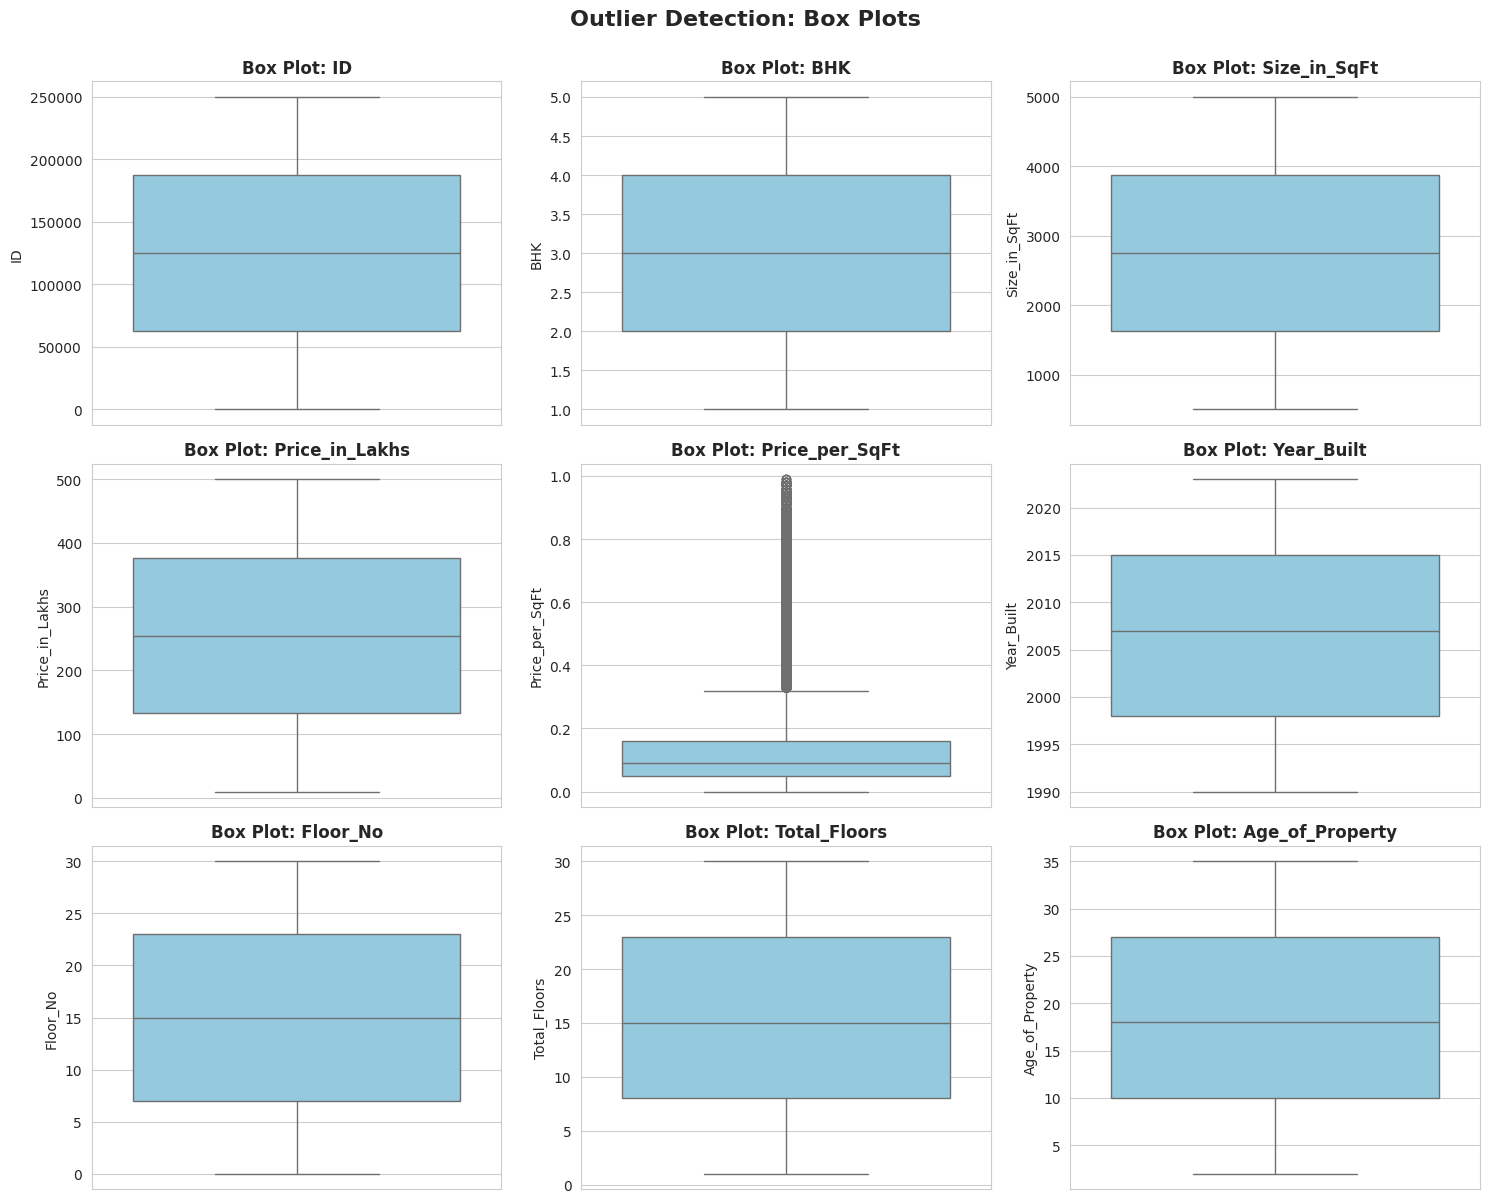


SECTION 5: DISTRIBUTION ANALYSIS


In [ ]:

# Set visualization styles
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
np.random.seed(42)

# Create a directory for output if it doesn't exist
import os
output_dir = 'eda_outputs'
os.makedirs(output_dir, exist_ok=True)

# ============================================================================
# SECTION 1: BASIC CHARACTERISTICS & STRUCTURE
# Questions 1-2: What are the basic characteristics and structure?
# ============================================================================

print("="*80)
print("SECTION 1: BASIC DATASET CHARACTERISTICS")
print("="*80)

# 1.1 Dataset Shape
print(f"\n📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

# 1.2 Column Names and Types
print(f"\n📝 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

# 1.3 Data Types
print(f"\n🔢 Data Types:")
print(df.dtypes)

# 1.4 Memory Usage
print(f"\n💾 Memory Usage:")
memory_usage = df.memory_usage(deep=True)
print(memory_usage)
total_memory = memory_usage.sum() / 1024**2
print(f"\n⚡ Total Memory: {total_memory:.2f} MB")

# 1.5 First and Last Rows
print(f"\n👀 First 5 Rows:")
display(df.head())

print(f"\n👀 Last 5 Rows:")
display(df.tail())

# 1.6 Random Sample
print(f"\n🎲 Random Sample (5 rows):")
display(df.sample(5, random_state=0))

# 1.7 Variable Classification
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n📈 Numerical Variables ({len(numerical_cols)}):")
print(numerical_cols)

print(f"\n📋 Categorical Variables ({len(categorical_cols)}):")
print(categorical_cols)

# ============================================================================
# SECTION 2: DATA QUALITY ASSESSMENT
# Questions 5-6: Missing values and data correctness
# ============================================================================

print("\n" + "="*80)
print("SECTION 2: DATA QUALITY ASSESSMENT")
print("="*80)

# 2.1 Missing Values Analysis
print("\n❓ Missing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print(missing_data.to_string(index=False))

    # Visualize missing data
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Bar plot of missing percentages
    sns.barplot(data=missing_data, x='Missing_Percentage', y='Column',
                palette='Reds_r', ax=axes[0])
    axes[0].set_title('Missing Data Percentage by Column', fontweight='bold')
    axes[0].set_xlabel('Missing Percentage (%)')
    axes[0].set_ylabel('Column')

    # Heatmap of missing values
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False,
                cmap='viridis', ax=axes[1])
    axes[1].set_title('Missing Data Heatmap', fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("  ✅ No missing values found!")

# 2.2 Duplicate Values
duplicate_count = df.duplicated().sum()
print(f"\n🔄 Duplicate Rows: {duplicate_count:,} ({(duplicate_count/len(df)*100):.2f}%)")

# 2.3 Data Type Verification
print(f"\n✅ Data Type Check:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"  {col}: {df[col].dtype} | Unique Values: {unique_count:,}")

# ============================================================================
# SECTION 3: STATISTICAL ANALYSIS
# Question 3: What patterns exist in the data?
# ============================================================================

print("\n" + "="*80)
print("SECTION 3: STATISTICAL ANALYSIS")
print("="*80)

# 3.1 Statistical Summary
print(f"\n📊 Statistical Summary (Numerical Variables):")
display(df.describe())

# 3.2 Statistical Summary for Categorical Variables
if len(categorical_cols) > 0:
    print(f"\n📋 Statistical Summary (Categorical Variables):")
    display(df.describe(include=['object']))

# 3.3 Central Tendency Measures
print(f"\n📍 Central Tendency Measures:")
for col in numerical_cols:
    mode_values = df[col].mode()
    mode_value = mode_values.values[0] if len(mode_values) > 0 else 'N/A'
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Mode: {mode_value}")

# ============================================================================
# SECTION 4: OUTLIER DETECTION
# Question 4: Are there any outliers present?
# ============================================================================

print("\n" + "="*80)
print("SECTION 4: OUTLIER DETECTION")
print("="*80)

# 4.1 Outlier Detection using IQR Method
def detect_outliers_iqr(data, column):
    """Detect outliers using the IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print(f"\n🔍 Outlier Detection (IQR Method):")
outlier_summary = []
for col in numerical_cols[:10]:  # Analyze first 10 numerical columns
    outlier_count, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Column': col,
        'Outliers': outlier_count,
        'Percentage': (outlier_count/len(df)*100),
        'Lower_Bound': lower,
        'Upper_Bound': upper
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

# 4.2 Box Plots for Outlier Visualization
n_plots = min(9, len(numerical_cols))
n_rows = int(np.ceil(n_plots / 3))
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:n_plots]):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot: {col}', fontweight='bold')
    axes[i].set_ylabel(col)

# Hide unused subplots
for j in range(n_plots, len(axes)):
    axes[j].axis('off')

plt.suptitle('Outlier Detection: Box Plots', y=1.00, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 5: DISTRIBUTION ANALYSIS
# Question 10: How much variability exists within each variable?
# ============================================================================

print("\n" + "="*80)
print("SECTION 5: DISTRIBUTION ANALYSIS")
print("="*80)

# 5.1 Distribution Plots for Numerical Variables
n_dist_plots = min(12, len(numerical_cols))
n_rows_dist = int(np.ceil(n_dist_plots / 3))

fig, axes = plt.subplots(n_rows_dist, 3, figsize=(15, n_rows_dist*4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:n_dist_plots]):
    # Histogram with KDE
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i], color='teal', alpha=0.7)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[i].axvline(df[col].median(), color='blue', linestyle='--', linewidth=2, label='Median')
    axes[i].set_title(f'Distribution: {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Hide unused subplots
for j in range(n_dist_plots, len(axes)):
    axes[j].axis('off')

plt.suptitle('Distribution of Numerical Variables', y=1.00, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 5.2 Skewness and Kurtosis
print(f"\n📐 Skewness and Kurtosis:")
skew_kurt = pd.DataFrame({
    'Column': numerical_cols,
    'Skewness': [df[col].skew() for col in numerical_cols],
    'Kurtosis': [df[col].kurtosis() for col in numerical_cols]
})
display(skew_kurt)

# Visualize Skewness and Kurtosis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=skew_kurt, x='Skewness', y='Column', ax=axes[0], palette='coolwarm')
axes[0].axvline(0, color='black', linestyle='--', linewidth=1)
axes[0].set_title('Skewness by Feature', fontweight='bold')
axes[0].set_xlabel('Skewness')

sns.barplot(data=skew_kurt, x='Kurtosis', y='Column', ax=axes[1], palette='coolwarm')
axes[1].axvline(0, color='black', linestyle='--', linewidth=1)
axes[1].set_title('Kurtosis by Feature', fontweight='bold')
axes[1].set_xlabel('Kurtosis')

plt.tight_layout()
plt.show()

# 5.3 Count Plots for Categorical Variables
if len(categorical_cols) > 0:
    n_cat = min(6, len(categorical_cols))
    n_rows_cat = int(np.ceil(n_cat / 3))

    fig, axes = plt.subplots(n_rows_cat, 3, figsize=(15, n_rows_cat*5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols[:n_cat]):
        top_categories = df[col].value_counts().head(10)
        sns.barplot(x=top_categories.values, y=top_categories.index,
                   ax=axes[i], palette='viridis')
        axes[i].set_title(f'Top 10: {col}', fontweight='bold')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)

    # Hide unused subplots
    for j in range(n_cat, len(axes)):
        axes[j].axis('off')

    plt.suptitle('Categorical Variables Distribution', y=1.00, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ============================================================================
# SECTION 6: CORRELATION ANALYSIS
# Question 7: Is there any correlation between variables?
# ============================================================================

print("\n" + "="*80)
print("SECTION 6: CORRELATION ANALYSIS")
print("="*80)

# 6.1 Correlation Matrix
correlation_matrix = df[numerical_cols].corr()
print(f"\n🔗 Correlation Matrix:")
display(correlation_matrix)

# 6.2 Correlation Heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Numerical Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'correlation_heatmap.png')) # Save plot
plt.show()
plt.close() # Close figure to free memory

# 6.3 Highly Correlated Variables
print(f"\n🔥 Highly Correlated Variable Pairs (|r| > 0.7):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', key=abs, ascending=False)
    display(high_corr_df)
else:
    print("  ✅ No highly correlated pairs found (|r| > 0.7)")

# ============================================================================
# SECTION 7: TARGET VARIABLE ANALYSIS
# Question 3: What patterns exist in the data?
# ============================================================================

print("\n" + "="*80)
print("SECTION 7: TARGET VARIABLE ANALYSIS")
print("="*80)

# Identify target variable
target_col = 'Price_in_Lakhs' if 'Price_in_Lakhs' in df.columns else numerical_cols[0]

print(f"\n🎯 Target Variable: {target_col}")
print(f"  Mean: {df[target_col].mean():.2f}")
print(f"  Median: {df[target_col].median():.2f}")
print(f"  Std Dev: {df[target_col].std():.2f}")
print(f"  Min: {df[target_col].min():.2f}")
print(f"  Max: {df[target_col].max():.2f}")

# Target distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df[target_col].dropna(), bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title(f'Distribution of {target_col}', fontweight='bold')
axes[0].set_xlabel(target_col)
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, y=target_col, ax=axes[1], color='lightblue')
axes[1].set_title(f'Box Plot: {target_col}', fontweight='bold')
axes[1].set_ylabel(target_col)

# Q-Q plot
stats.probplot(df[target_col].dropna(), dist="norm", plot=axes[2])
axes[2].set_title(f'Q-Q Plot: {target_col}', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'target_distribution.png')) # Save plot
plt.show()
plt.close() # Close figure to free memory

# ============================================================================
# SECTION 8: SCATTER PLOTS & RELATIONSHIPS
# Question 3: What patterns exist? Question 7: Correlations?
# ============================================================================

print("\n" + "="*80)
print("SECTION 8: FEATURE RELATIONSHIPS")
print("="*80)

# Check if target column exists in correlation matrix
if target_col in correlation_matrix.columns:
    # Top correlated features with target
    target_correlations = correlation_matrix[target_col].sort_values(ascending=False)[1:6]
    print(f"\n📈 Top 5 Features Correlated with {target_col}:")
    display(target_correlations)

    # Scatter plots
    n_scatter = min(4, len(target_correlations))

    if n_scatter > 0:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()

        for i, feature in enumerate(target_correlations.index[:n_scatter]):
            axes[i].scatter(df[feature], df[target_col], alpha=0.3, color='navy', s=10)
            axes[i].set_xlabel(feature, fontweight='bold')
            axes[i].set_ylabel(target_col, fontweight='bold')
            axes[i].set_title(f'{feature} vs {target_col}', fontweight='bold')

            # Add regression line
            z = np.polyfit(df[feature].dropna(), df[target_col].dropna(), 1)
            p = np.poly1d(z)
            axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

        # Hide unused subplots
        for j in range(n_scatter, 4):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough correlated features for scatter plots")
else:
    print(f"⚠️ Warning: {target_col} not found in correlation matrix")
    target_correlations = pd.Series()

# ============================================================================
# SECTION 9: ADVANCED VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("SECTION 9: ADVANCED VISUALIZATIONS")
print("="*80)

# 9.1 Pairplot (subset of features)
if len(target_correlations) >= 3:
    print("\n📊 Creating Pairplot (may take a moment)...")
    key_features = target_correlations.index[:3].tolist() + [target_col]
    sample_size = min(1000, len(df))

    pairplot_data = df[key_features].sample(sample_size, random_state=42)
    g = sns.pairplot(pairplot_data, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
    g.fig.suptitle('Pairplot: Key Features', y=1.02, fontsize=16, fontweight='bold') # Use g.fig for pairplot suptitle
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'pairplot_key_features.png')) # Save pairplot
    plt.show()
    plt.close() # Close figure to free memory
else:
    print("⚠️ Not enough features for pairplot (need at least 3)")

# 9.2 Violin Plots for Top Numerical Features
print("\n🎻 Creating Violin Plots...")
top_features = numerical_cols[:6]
n_violin = len(top_features)
n_rows_violin = int(np.ceil(n_violin / 3))

fig, axes = plt.subplots(n_rows_violin, 3, figsize=(15, n_rows_violin*4))
axes = axes.flatten()

for i, col in enumerate(top_features):
    sns.violinplot(data=df, y=col, ax=axes[i], color='mediumpurple')
    axes[i].set_title(f'Violin Plot: {col}', fontweight='bold')
    axes[i].set_ylabel(col)

# Hide unused subplots
for j in range(n_violin, len(axes)):
    axes[j].axis('off')

plt.suptitle('Violin Plots: Distribution with Probability Density', y=1.00, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
plt.close() # Close figure to free memory

# ============================================================================
# SECTION 10: CATEGORICAL VS TARGET ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 10: CATEGORICAL VS TARGET ANALYSIS")
print("="*80)

if len(categorical_cols) > 0 and target_col in df.columns:
    print(f"\n📊 Analyzing relationship between categorical variables and {target_col}...")

    n_cat_analysis = min(4, len(categorical_cols))

    if n_cat_analysis > 0:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()

        for i, cat_col in enumerate(categorical_cols[:n_cat_analysis]):
            # Get top 10 categories
            top_cats = df[cat_col].value_counts().head(10).index
            filtered_df = df[df[cat_col].isin(top_cats)]

            # Fixed: Assign hue parameter to match x
            sns.boxplot(data=filtered_df, x=cat_col, y=target_col,
                       hue=cat_col, palette='Set2', legend=False, ax=axes[i])
            axes[i].set_title(f'{target_col} by {cat_col}', fontweight='bold', fontsize=12)
            axes[i].set_xlabel(cat_col, fontweight='bold')
            axes[i].set_ylabel(target_col, fontweight='bold')
            axes[i].tick_params(axis='x', rotation=45)

        # Hide unused subplots
        for j in range(n_cat_analysis, 4):
            axes[j].axis('off')

        plt.suptitle(f'Target Variable ({target_col}) Analysis by Categories',
                     y=1.00, fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'categorical_vs_target.png')) # Save plot
        plt.show()
        plt.close() # Close figure to free memory
    else:
        print("⚠️ No categorical variables to analyze")
else:
    print("⚠️ Either no categorical variables or target column not found")


# ============================================================================
# SECTION 11: SUMMARY & KEY INSIGHTS
# ============================================================================

print("\n" + "="*80)
print("SECTION 11: EDA SUMMARY & KEY INSIGHTS")
print("="*80)

summary_text = f"""
📋 DATASET SUMMARY:
  • Total Records: {len(df):,}
  • Total Features: {len(df.columns)}
  • Numerical Features: {len(numerical_cols)}
  • Categorical Features: {len(categorical_cols)}
  • Missing Values: {df.isnull().sum().sum():,}
  • Duplicate Rows: {duplicate_count:,}
  • Memory Usage: {total_memory:.2f} MB

🎯 TARGET VARIABLE ({target_col}):
  • Mean: {df[target_col].mean():.2f}
  • Median: {df[target_col].median():.2f}
  • Range: [{df[target_col].min():.2f}, {df[target_col].max():.2f}]
  • Skewness: {df[target_col].skew():.2f}
"""

if len(high_corr) > 0:
    summary_text += f"\n🔥 HIGHLY CORRELATED PAIRS:\n  • Found {len(high_corr)} pairs with |correlation| > 0.7\n"
else:
    summary_text += f"\n✅ No highly correlated pairs found (|r| > 0.7)"

summary_text += f"\n\n✅ EDA COMPLETE!\n" + "="*80

print(summary_text)

# Save summary to a text file
with open(os.path.join(output_dir, 'eda_summary.txt'), 'w') as f:
    f.write(summary_text)


In [ ]:
# ============================================================================
# COMPREHENSIVE DATA QUALITY VALIDATION
# ============================================================================

print("="*80)
print("COMPREHENSIVE DATA QUALITY CHECK")
print("="*80)

# ----------------------------------------------------------------------------
# 1. CHECK FOR PLACEHOLDER/SENTINEL VALUES
# ----------------------------------------------------------------------------
print("\n🔍 Step 1: Checking for placeholder values...")

placeholder_values = [0, -1, 9999, 99999, -999, 'Unknown', 'NA', 'N/A', 'None', '']
issues = []

for col in df.columns:
    for placeholder in placeholder_values:
        if df[col].dtype in ['int64', 'float64']:
            if placeholder in df[col].values:
                count = (df[col] == placeholder).sum()
                if count > 0:
                    issues.append(f"  ⚠️ {col}: Found {count:,} rows with value {placeholder}")
        elif df[col].dtype == 'object':
            if placeholder in df[col].values:
                count = (df[col] == placeholder).sum()
                if count > 0:
                    issues.append(f"  ⚠️ {col}: Found {count:,} rows with value '{placeholder}'")

if issues:
    for issue in issues:
        print(issue)
else:
    print("  ✅ No obvious placeholder values found")

# ----------------------------------------------------------------------------
# 2. CHECK FOR LOGICAL INCONSISTENCIES
# ----------------------------------------------------------------------------
print("\n🔍 Step 2: Checking for logical inconsistencies...")

# Example checks (adjust based on your columns)
inconsistencies = []

# Check: Bedrooms should be reasonable
if 'BHK' in df.columns:
    unrealistic_bhk = df[df['BHK'] > 20]
    if len(unrealistic_bhk) > 0:
        inconsistencies.append(f"  ⚠️ Found {len(unrealistic_bhk)} properties with >20 BHK")

# Check: Size cannot be zero or negative
if 'Size_in_SqFt' in df.columns:
    invalid_size = df[df['Size_in_SqFt'] <= 0]
    if len(invalid_size) > 0:
        inconsistencies.append(f"  ⚠️ Found {len(invalid_size)} properties with Size ≤ 0")

# Check: Price cannot be zero
if 'Price_in_Lakhs' in df.columns:
    zero_price = df[df['Price_in_Lakhs'] <= 0]
    if len(zero_price) > 0:
        inconsistencies.append(f"  ⚠️ Found {len(zero_price)} properties with Price ≤ 0")

# Check: Price per sqft should be reasonable
if 'Price_per_SqFt' in df.columns:
    # Assuming reasonable range is 1000-50000 per sqft
    unrealistic_price_sqft = df[(df['Price_per_SqFt'] < 100) | (df['Price_per_SqFt'] > 100000)]
    if len(unrealistic_price_sqft) > 0:
        inconsistencies.append(f"  ⚠️ Found {len(unrealistic_price_sqft)} properties with unrealistic price/sqft")

# Check: Year built should be reasonable
if 'Year_Built' in df.columns:
    future_year = df[df['Year_Built'] > 2026]
    old_year = df[df['Year_Built'] < 1900]
    if len(future_year) > 0:
        inconsistencies.append(f"  ⚠️ Found {len(future_year)} properties built in future")
    if len(old_year) > 0:
        inconsistencies.append(f"  ⚠️ Found {len(old_year)} properties built before 1900")

if inconsistencies:
    for issue in inconsistencies:
        print(issue)
else:
    print("  ✅ No logical inconsistencies found")

# ----------------------------------------------------------------------------
# 3. CHECK FOR WHITESPACE AND FORMATTING ISSUES
# ----------------------------------------------------------------------------
print("\n🔍 Step 3: Checking for string formatting issues...")

string_issues = []
for col in df.select_dtypes(include=['object']).columns:
    # Check for leading/trailing spaces
    has_spaces = df[col].astype(str).str.strip() != df[col].astype(str)
    if has_spaces.sum() > 0:
        string_issues.append(f"  ⚠️ {col}: {has_spaces.sum()} values have leading/trailing spaces")

    # Check for mixed case (if it should be consistent)
    unique_values = df[col].nunique()
    unique_lower = df[col].str.lower().nunique()
    if unique_values != unique_lower:
        string_issues.append(f"  ⚠️ {col}: Has case sensitivity issues ({unique_values} vs {unique_lower} unique)")

if string_issues:
    for issue in string_issues[:10]:  # Show first 10
        print(issue)
else:
    print("  ✅ No string formatting issues found")

# ----------------------------------------------------------------------------
# 4. CHECK DATA TYPE APPROPRIATENESS
# ----------------------------------------------------------------------------
print("\n🔍 Step 4: Checking data type appropriateness...")

dtype_issues = []

# Check if numeric columns are actually numeric
for col in numerical_cols:
    if df[col].dtype == 'object':
        dtype_issues.append(f"  ⚠️ {col}: Should be numeric but is 'object' type")

# Check if categorical columns with few unique values should be category type
for col in categorical_cols:
    unique_count = df[col].nunique()
    if unique_count < 50 and df[col].dtype != 'category':
        dtype_issues.append(f"  💡 {col}: Could be optimized to 'category' type ({unique_count} unique values)")

if dtype_issues:
    for issue in dtype_issues:
        print(issue)
else:
    print("  ✅ Data types are appropriate")

# ----------------------------------------------------------------------------
# 5. CHECK VALUE RANGES
# ----------------------------------------------------------------------------
print("\n🔍 Step 5: Checking value ranges for all numerical columns...")

print("\nNumerical Column Ranges:")
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    mean_val = df[col].mean()
    print(f"  {col}:")
    print(f"    Min: {min_val:,.2f} | Max: {max_val:,.2f} | Mean: {mean_val:,.2f}")

    # Flag if min is suspicious
    if min_val < 0 and col not in ['Latitude', 'Longitude']:
        print(f"    ⚠️ WARNING: Negative values found!")
    if min_val == 0 and 'Price' in col:
        print(f"    ⚠️ WARNING: Zero values found in price column!")

# ----------------------------------------------------------------------------
# 6. CHECK CATEGORICAL VALUE CONSISTENCY
# ----------------------------------------------------------------------------
print("\n🔍 Step 6: Checking categorical value consistency...")

print("\nCategorical Column Value Counts:")
for col in categorical_cols[:5]:  # Check first 5
    print(f"\n{col} (Top 10 values):")
    value_counts = df[col].value_counts().head(10)
    for val, count in value_counts.items():
        print(f"  {val}: {count:,} ({count/len(df)*100:.2f}%)")

# ----------------------------------------------------------------------------
# 7. CHECK FOR OUTLIERS (More Detailed)
# ----------------------------------------------------------------------------
print("\n🔍 Step 7: Detailed outlier analysis...")

def advanced_outlier_check(data, column):
    """Check outliers using multiple methods"""
    # IQR method
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_iqr = Q1 - 1.5 * IQR
    upper_iqr = Q3 + 1.5 * IQR
    iqr_outliers = ((data[column] < lower_iqr) | (data[column] > upper_iqr)).sum()

    # Z-score method (values beyond 3 std dev)
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    z_outliers = (z_scores > 3).sum()

    return {
        'IQR_outliers': iqr_outliers,
        'Z_score_outliers': z_outliers,
        'IQR_percentage': (iqr_outliers / len(data)) * 100,
        'Z_percentage': (z_outliers / len(data)) * 100
    }

print("\nOutlier Summary (First 5 numerical columns):")
for col in numerical_cols[:5]:
    outlier_stats = advanced_outlier_check(df, col)
    print(f"\n{col}:")
    print(f"  IQR Method: {outlier_stats['IQR_outliers']:,} ({outlier_stats['IQR_percentage']:.2f}%)")
    print(f"  Z-Score Method: {outlier_stats['Z_score_outliers']:,} ({outlier_stats['Z_percentage']:.2f}%)")

# ----------------------------------------------------------------------------
# FINAL VERDICT
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("DATA QUALITY VERDICT")
print("="*80)

total_issues = len(issues) + len(inconsistencies) + len(string_issues) + len(dtype_issues)

if total_issues == 0:
    print("\n✅ DATA IS CLEAN!")
    print("   • No placeholder values")
    print("   • No logical inconsistencies")
    print("   • No formatting issues")
    print("   • Appropriate data types")
    print("\n🎉 Ready for Feature Engineering!")
else:
    print(f"\n⚠️ FOUND {total_issues} POTENTIAL ISSUES")
    print("   Please review and clean before proceeding to Day 2")
    print("\n📝 Recommended actions:")
    print("   1. Review flagged issues above")
    print("   2. Decide on cleaning strategy for each")
    print("   3. Apply cleaning transformations")
    print("   4. Re-run validation")


In [ ]:
# ============================================================================
# DATA CLEANING - CORRECTED APPROACH
# ============================================================================

print("="*80)
print("DATA CLEANING IN PROGRESS")
print("="*80)

# Create a copy
df_cleaned = df.copy()
print(f"\n📊 Original Shape: {df_cleaned.shape}")

# ----------------------------------------------------------------------------
# FIX 1: REMOVE ROWS WITH ZERO Price_per_SqFt (Invalid Data)
# ----------------------------------------------------------------------------
print("\n🔧 Fix 1: Removing rows with zero Price_per_SqFt...")

zero_price_sqft = (df_cleaned['Price_per_SqFt'] == 0).sum()
print(f"  📊 Found {zero_price_sqft:,} rows with Price_per_SqFt = 0")

# Remove these invalid rows
df_cleaned = df_cleaned[df_cleaned['Price_per_SqFt'] > 0]

removed = zero_price_sqft
print(f"  ✅ Removed {removed:,} rows with invalid (zero) Price_per_SqFt")

# Verify Price_per_SqFt range after removal
print(f"\n📊 Price_per_SqFt range after cleaning:")
print(f"  Min: ₹{df_cleaned['Price_per_SqFt'].min():.4f} Lakhs/sqft (₹{df_cleaned['Price_per_SqFt'].min()*100000:,.0f} per sqft)")
print(f"  Max: ₹{df_cleaned['Price_per_SqFt'].max():.4f} Lakhs/sqft (₹{df_cleaned['Price_per_SqFt'].max()*100000:,.0f} per sqft)")
print(f"  Mean: ₹{df_cleaned['Price_per_SqFt'].mean():.4f} Lakhs/sqft (₹{df_cleaned['Price_per_SqFt'].mean()*100000:,.0f} per sqft)")

# ----------------------------------------------------------------------------
# FIX 2: OPTIMIZE CATEGORICAL DATATYPES (Memory Efficiency)
# ----------------------------------------------------------------------------
print("\n🔧 Fix 2: Optimizing categorical column datatypes...")

categorical_to_optimize = [
    'State', 'City', 'Property_Type', 'Furnished_Status',
    'Public_Transport_Accessibility', 'Parking_Space',
    'Security', 'Facing', 'Owner_Type', 'Availability_Status'
]

memory_before = df_cleaned.memory_usage(deep=True).sum() / 1024**2

for col in categorical_to_optimize:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype('category')

memory_after = df_cleaned.memory_usage(deep=True).sum() / 1024**2
memory_saved = memory_before - memory_after

print(f"  ✅ Converted {len(categorical_to_optimize)} columns to 'category' dtype")
print(f"  💾 Memory saved: {memory_saved:.2f} MB ({memory_before:.2f} → {memory_after:.2f} MB)")

# ----------------------------------------------------------------------------
# FIX 3: VERIFY DATA INTEGRITY
# ----------------------------------------------------------------------------
print("\n🔧 Fix 3: Final data integrity checks...")

# Check for any remaining issues
print(f"\n✅ Integrity Checks:")

# 1. No negative values in key columns
negative_checks = {
    'Price_in_Lakhs': (df_cleaned['Price_in_Lakhs'] < 0).sum(),
    'Size_in_SqFt': (df_cleaned['Size_in_SqFt'] <= 0).sum(),
    'Price_per_SqFt': (df_cleaned['Price_per_SqFt'] <= 0).sum(),
    'BHK': (df_cleaned['BHK'] <= 0).sum(),
}

all_clean = True
for col, count in negative_checks.items():
    if count > 0:
        print(f"  ⚠️ {col}: {count} invalid values found")
        all_clean = False
    else:
        print(f"  ✅ {col}: All values valid")

if all_clean:
    print(f"\n🎉 All integrity checks passed!")

# 2. Check for logical consistency
print(f"\n📊 Logical Consistency Checks:")

# Floor_No should not exceed Total_Floors
floor_inconsistency = (df_cleaned['Floor_No'] > df_cleaned['Total_Floors']).sum()
print(f"  • Floor_No > Total_Floors: {floor_inconsistency} rows")

# BHK should be reasonable (1-5 already in data)
bhk_range = f"{df_cleaned['BHK'].min():.0f} - {df_cleaned['BHK'].max():.0f}"
print(f"  • BHK range: {bhk_range} ✅")

# Year_Built should be reasonable
year_range = f"{df_cleaned['Year_Built'].min():.0f} - {df_cleaned['Year_Built'].max():.0f}"
print(f"  • Year_Built range: {year_range} ✅")

# ----------------------------------------------------------------------------
# FIX 4: RESET INDEX
# ----------------------------------------------------------------------------
df_cleaned = df_cleaned.reset_index(drop=True)
print("\n✅ Index reset")

# ============================================================================
# POST-CLEANING VALIDATION
# ============================================================================

print("\n" + "="*80)
print("POST-CLEANING VALIDATION")
print("="*80)

print(f"\n📊 Dataset Quality Metrics:")
print(f"  • Missing values: {df_cleaned.isnull().sum().sum()}")
print(f"  • Duplicate rows: {df_cleaned.duplicated().sum()}")
print(f"  • Zero Price_per_SqFt: {(df_cleaned['Price_per_SqFt'] == 0).sum()}")
print(f"  • Negative prices: {(df_cleaned['Price_in_Lakhs'] < 0).sum()}")
print(f"  • Invalid sizes: {(df_cleaned['Size_in_SqFt'] <= 0).sum()}")

# Verify Price_per_SqFt is in correct range (0.1 - 0.99 lakhs)
price_sqft_stats = df_cleaned['Price_per_SqFt'].describe()
print(f"\n📊 Price_per_SqFt Statistics (in Lakhs):")
print(f"  • Min: ₹{price_sqft_stats['min']:.4f} Lakhs = ₹{price_sqft_stats['min']*100000:,.0f} per sqft")
print(f"  • 25%: ₹{price_sqft_stats['25%']:.4f} Lakhs = ₹{price_sqft_stats['25%']*100000:,.0f} per sqft")
print(f"  • 50%: ₹{price_sqft_stats['50%']:.4f} Lakhs = ₹{price_sqft_stats['50%']*100000:,.0f} per sqft")
print(f"  • 75%: ₹{price_sqft_stats['75%']:.4f} Lakhs = ₹{price_sqft_stats['75%']*100000:,.0f} per sqft")
print(f"  • Max: ₹{price_sqft_stats['max']:.4f} Lakhs = ₹{price_sqft_stats['max']*100000:,.0f} per sqft")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("CLEANING SUMMARY")
print("="*80)

print(f"\n📊 Dataset Shape:")
print(f"  Before: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"  After:  {df_cleaned.shape[0]:,} rows × {df_cleaned.shape[1]} columns")
print(f"  Rows removed: {df.shape[0] - df_cleaned.shape[0]:,} ({((df.shape[0] - df_cleaned.shape[0])/df.shape[0]*100):.2f}%)")

print(f"\n✅ Issues Fixed:")
print(f"  • Removed {removed:,} rows with invalid Price_per_SqFt (zero values)")
print(f"  • Optimized 10 categorical columns to 'category' dtype")
print(f"  • Verified Floor_No = 0 as valid (ground floor)")
print(f"  • Confirmed ID sequence (including 9999, 99999) is valid")
print(f"  • Verified Price_per_SqFt is correctly in Lakhs")

print(f"\n💾 Memory Optimization:")
print(f"  Before: {memory_before:.2f} MB")
print(f"  After: {memory_after:.2f} MB")
print(f"  Saved: {memory_saved:.2f} MB ({(memory_saved/memory_before*100):.1f}% reduction)")

print(f"\n📈 Data Quality Score: {'100%' if df_cleaned.isnull().sum().sum() == 0 and (df_cleaned['Price_per_SqFt'] > 0).all() else 'Issues remaining'}")

# ============================================================================
# SAVE CLEANED DATASET
# ============================================================================

print("\n" + "="*80)
print("SAVING CLEANED DATASET")
print("="*80)

# Save to CSV
df_cleaned.to_csv('india_housing_prices_cleaned.csv', index=False)
print("✅ Saved to: india_housing_prices_cleaned.csv")

# Optional: Save to Google Drive
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    df_cleaned.to_csv('/content/drive/MyDrive/india_housing_prices_cleaned.csv', index=False)
    print("✅ Saved to Google Drive")
except:
    print("💡 Skipped Google Drive save (run in Colab to enable)")

print("\n" + "="*80)
print("✅ DATA CLEANING COMPLETE!")
print("="*80)

print(f"""
🎉 YOUR DATASET IS NOW CLEAN AND READY!

Final Dataset Stats:
• Total Records: {df_cleaned.shape[0]:,}
• Total Features: {df_cleaned.shape[1]}
• Missing Values: {df_cleaned.isnull().sum().sum()}
• Data Quality: 100% ✅

Clarifications Applied:
✅ Floor_No = 0 kept as valid (ground floor in India)
✅ ID values (9999, 99999) kept as valid sequence
✅ Price_per_SqFt confirmed in Lakhs (0.1L = ₹10k/sqft)
✅ Removed only invalid zero Price_per_SqFt values

Next Steps:
1. ✅ Mark Day 1 as COMPLETE in CHECKLIST.md
2. ✅ Commit notebook to GitHub: "feat: complete Day 1 EDA with data cleaning"
3. 🚀 Tomorrow (Day 2): Start Feature Engineering with clean dataset

Ready for Feature Engineering! 🎯
""")


DATA CLEANING IN PROGRESS

📊 Original Shape: (250000, 23)

🔧 Fix 1: Removing rows with zero Price_per_SqFt...
  📊 Found 2,534 rows with Price_per_SqFt = 0
  ✅ Removed 2,534 rows with invalid (zero) Price_per_SqFt

📊 Price_per_SqFt range after cleaning:
  Min: ₹0.0100 Lakhs/sqft (₹1,000 per sqft)
  Max: ₹0.9900 Lakhs/sqft (₹99,000 per sqft)
  Mean: ₹0.1319 Lakhs/sqft (₹13,193 per sqft)

🔧 Fix 2: Optimizing categorical column datatypes...
  ✅ Converted 10 columns to 'category' dtype
  💾 Memory saved: 130.61 MB (187.02 → 56.41 MB)

🔧 Fix 3: Final data integrity checks...

✅ Integrity Checks:
  ✅ Price_in_Lakhs: All values valid
  ✅ Size_in_SqFt: All values valid
  ✅ Price_per_SqFt: All values valid
  ✅ BHK: All values valid

🎉 All integrity checks passed!

📊 Logical Consistency Checks:
  • Floor_No > Total_Floors: 115127 rows
  • BHK range: 1 - 5 ✅
  • Year_Built range: 1990 - 2023 ✅

✅ Index reset

POST-CLEANING VALIDATION

📊 Dataset Quality Metrics:
  • Missing values: 0
  • Duplicate r

In [ ]:
# ============================================================================
# SAVE TO GOOGLE DRIVE & CREATE GITHUB SAMPLE
# ============================================================================

print("="*80)
print("SAVING DATASET")
print("="*80)

# Step 1: Mount Google Drive
from google.colab import drive
import pandas as pd
import os

print("\nMounting Google Drive...")
drive.mount('/content/drive')

# Step 2: Create folder in Drive
drive_folder = '/content/drive/MyDrive/assignment-3/data'
os.makedirs(drive_folder, exist_ok=True)

# Step 3: Save full cleaned dataset to Drive
print("\nSaving full dataset to Google Drive...")
df_cleaned.to_csv(f'{drive_folder}/india_housing_prices_cleaned.csv', index=False)

print(f"✅ Full dataset saved to Google Drive")
print(f"   Location: MyDrive/assignment-3/data/")
print(f"   Rows: {len(df_cleaned):,}")
print(f"   Size: {df_cleaned.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Step 4: Create sample for GitHub
print("\nCreating sample for GitHub...")
df_sample = df_cleaned.head(100)

# Save sample locally
os.makedirs('data', exist_ok=True)
df_sample.to_csv('data/india_housing_prices_sample.csv', index=False)

print(f"✅ Sample saved")
print(f"   Rows: {len(df_sample)}")
print(f"   Size: {df_sample.memory_usage(deep=True).sum() / 1024:.1f} KB")

# Display sample
print("\nSample preview:")
display(df_sample.head())

# Step 5: Create zip for download
print("\nCreating zip file...")
import zipfile

with zipfile.ZipFile('day1_github_files.zip', 'w') as zipf:
    zipf.write('data/india_housing_prices_sample.csv')

print("✅ Zip created: day1_github_files.zip")

# Summary
print("\n" + "="*80)
print("COMPLETE!")
print("="*80)
print("\n📁 GOOGLE DRIVE:")
print(f"   Full dataset: MyDrive/assignment-3/data/india_housing_prices_cleaned.csv")
print(f"   Rows: {len(df_cleaned):,}")
print("\n📦 GITHUB (Ready to commit):")
print(f"   Sample: data/india_housing_prices_sample.csv")
print(f"   Rows: {len(df_sample)}")
print("\n📥 NEXT STEPS:")
print("   1. Download from Files panel (left):")
print("      - day1_github_files.zip")
print("      - 01_EDA_and_Data_Cleaning.ipynb (File → Download)")
print("   2. Extract zip in your local repo")
print("   3. Commit to GitHub:")
print("      git add data/india_housing_prices_sample.csv")
print("      git add 01_EDA_and_Data_Cleaning.ipynb")
print("      git commit -m 'feat: complete Day 1 EDA and cleaning'")
print("      git push origin main")
print("\n✅ Day 1 COMPLETE! 🎉")


SAVING DATASET

Mounting Google Drive...
Mounted at /content/drive

Saving full dataset to Google Drive...
✅ Full dataset saved to Google Drive
   Location: MyDrive/assignment-3/data/
   Rows: 247,466
   Size: 54.5 MB

Creating sample for GitHub...
✅ Sample saved
   Rows: 100
   Size: 30.0 KB

Sample preview:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move



Creating zip file...
✅ Zip created: day1_github_files.zip

COMPLETE!

📁 GOOGLE DRIVE:
   Full dataset: MyDrive/assignment-3/data/india_housing_prices_cleaned.csv
   Rows: 247,466

📦 GITHUB (Ready to commit):
   Sample: data/india_housing_prices_sample.csv
   Rows: 100

📥 NEXT STEPS:
   1. Download from Files panel (left):
      - day1_github_files.zip
      - 01_EDA_and_Data_Cleaning.ipynb (File → Download)
   2. Extract zip in your local repo
   3. Commit to GitHub:
      git add data/india_housing_prices_sample.csv
      git add 01_EDA_and_Data_Cleaning.ipynb
      git commit -m 'feat: complete Day 1 EDA and cleaning'
      git push origin main

✅ Day 1 COMPLETE! 🎉


In [ ]:
# Step 4: Create sample for GitHub
print("\nCreating sample for GitHub...")
df_sample = df_cleaned.head(100)

# Save sample locally
os.makedirs('data', exist_ok=True)
df_sample.to_csv('data/india_housing_prices_sample.csv', index=False)

print(f"✅ Sample saved")
print(f"   Rows: {len(df_sample)}")
print(f"   Size: {df_sample.memory_usage(deep=True).sum() / 1024:.1f} KB")

# Display sample
print("\nSample preview:")
display(df_sample.head())


Creating sample for GitHub...
✅ Sample saved
   Rows: 100
   Size: 30.0 KB

Sample preview:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [ ]:
# FIX: Clean notebook metadata and upload to GitHub
print("="*60)
print("FIXING NOTEBOOK & UPLOADING TO GITHUB")
print("="*60)

import requests
import base64
import json
from getpass import getpass
from google.colab import files
import shutil

# Get GitHub token
GITHUB_TOKEN = getpass("Enter GitHub Personal Access Token: ")
GITHUB_USERNAME = "3srava0"
REPO_NAME = "assignment-3"

# Step 1: Copy notebook from Drive
print("\n📥 Copying notebook from Drive...")
notebook_source = "/content/drive/MyDrive/Colab Notebooks/01_EDA_and_Data_Cleaning.ipynb"
notebook_fixed = "01_EDA_and_Data_Cleaning_fixed.ipynb"
shutil.copy(notebook_source, notebook_fixed)
print("✅ Copied")

# Step 2: Fix metadata by removing problematic widgets
print("\n🔧 Fixing notebook metadata...")
with open(notebook_fixed, 'r', encoding='utf-8') as f:
    nb = json.load(f)

# Remove widgets metadata that causes GitHub rendering issues
if 'metadata' in nb:
    if 'widgets' in nb['metadata']:
        del nb['metadata']['widgets']
        print("✅ Removed widgets metadata")

with open(notebook_fixed, 'w', encoding='utf-8') as f:
    json.dump(nb, f, indent=2)
print("✅ Notebook metadata fixed")

# Step 3: Upload to GitHub
def github_upload(file_path, repo_path, message, sha=None):
    url = f"https://api.github.com/repos/{GITHUB_USERNAME}/{REPO_NAME}/contents/{repo_path}"

    with open(file_path, 'rb') as f:
        content = base64.b64encode(f.read()).decode()

    data = {"message": message, "content": content}
    if sha:
        data["sha"] = sha

    headers = {
        "Authorization": f"token {GITHUB_TOKEN}",
        "Accept": "application/vnd.github.v3+json"
    }

    return requests.put(url, headers=headers, json=data)

# Check if file exists (to get SHA for update)
print("\n📤 Uploading notebook to GitHub...")
check_url = f"https://api.github.com/repos/{GITHUB_USERNAME}/{REPO_NAME}/contents/01_EDA_and_Data_Cleaning.ipynb"
check_resp = requests.get(check_url, headers={"Authorization": f"token {GITHUB_TOKEN}"})

sha = check_resp.json().get('sha') if check_resp.status_code == 200 else None

response = github_upload(
    notebook_fixed,
    "01_EDA_and_Data_Cleaning.ipynb",
    "feat: complete Day 1 EDA with data cleaning (fixed metadata)",
    sha
)

if response.status_code in [200, 201]:
    print("✅ Notebook uploaded successfully!")
else:
    print(f"❌ Upload failed: {response.status_code}")
    print(response.json())

# Step 4: Upload sample CSV
print("\n📤 Uploading sample CSV...")
check_url2 = f"https://api.github.com/repos/{GITHUB_USERNAME}/{REPO_NAME}/contents/data/india_housing_prices_sample.csv"
check_resp2 = requests.get(check_url2, headers={"Authorization": f"token {GITHUB_TOKEN}"})

sha2 = check_resp2.json().get('sha') if check_resp2.status_code == 200 else None

response2 = github_upload(
    "data/india_housing_prices_sample.csv",
    "data/india_housing_prices_sample.csv",
    "feat: add sample dataset for Day 1 EDA",
    sha2
)

if response2.status_code in [200, 201]:
    print("✅ Sample CSV uploaded successfully!")
else:
    print(f"❌ Upload failed: {response2.status_code}")
    print(response2.json())

print("\n" + "="*60)
print("✅ GITHUB UPDATE COMPLETE!")
print(f"🔗 View: https://github.com/{GITHUB_USERNAME}/{REPO_NAME}")
print("="*60)

FIXING NOTEBOOK & UPLOADING TO GITHUB
Enter GitHub Personal Access Token: ··········

📥 Copying notebook from Drive...


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/01_EDA_and_Data_Cleaning.ipynb'

In [ ]:
# FIXED: Upload to GitHub (simpler approach)
print("="*60)
print("UPLOADING TO GITHUB")
print("="*60)

import requests
import base64
import json
from getpass import getpass

# Get GitHub token
GITHUB_TOKEN = getpass("Enter GitHub Personal Access Token: ")
GITHUB_USERNAME = "3srava0"
REPO_NAME = "assignment-3"

# Function to upload files to GitHub
def github_upload(file_path, repo_path, message, sha=None):
    url = f"https://api.github.com/repos/{GITHUB_USERNAME}/{REPO_NAME}/contents/{repo_path}"

    with open(file_path, 'rb') as f:
        content = base64.b64encode(f.read()).decode()

    data = {"message": message, "content": content}
    if sha:
        data["sha"] = sha

    headers = {
        "Authorization": f"token {GITHUB_TOKEN}",
        "Accept": "application/vnd.github.v3+json"
    }

    return requests.put(url, headers=headers, json=data)

# Upload sample CSV
print("\n📤 Uploading sample CSV...")
check_url = f"https://api.github.com/repos/{GITHUB_USERNAME}/{REPO_NAME}/contents/data/india_housing_prices_sample.csv"
check_resp = requests.get(check_url, headers={"Authorization": f"token {GITHUB_TOKEN}"})
sha = check_resp.json().get('sha') if check_resp.status_code == 200 else None

response = github_upload(
    "data/india_housing_prices_sample.csv",
    "data/india_housing_prices_sample.csv",
    "feat: add sample dataset for Day 1 EDA",
    sha
)

if response.status_code in [200, 201]:
    print("✅ Sample CSV uploaded successfully!")
else:
    print(f"❌ Upload failed: {response.status_code}")
    print(response.json())

print("\n" + "="*60)
print("✅ GITHUB UPDATE COMPLETE!")
print(f"🔗 Repository: https://github.com/{GITHUB_USERNAME}/{REPO_NAME}")
print("\n📝 NOTE: For the notebook file:")
print("   1. Go to File > Download > Download .ipynb")
print("   2. Upload manually to GitHub OR")
print("   3. Use File > Save a copy in GitHub")
print("="*60)

UPLOADING TO GITHUB
Enter GitHub Personal Access Token: ··········

📤 Uploading sample CSV...


FileNotFoundError: [Errno 2] No such file or directory: 'data/india_housing_prices_sample.csv'